In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fdb_dir = 'FungiDB'
ncbi_dir = 'NCBI'
onek_dir = '1000_Fungi_Project'
ensembl_dir = 'EnsemblFungi'
mycocosm_dir = 'Mycocosm'

# fungidb, 1k, ncbi (inc ensembleFungi)
fdb = pd.read_csv(f'{fdb_dir}/fungidb_input_species.csv')
fdb['source'] = 'fdb'

ncbi = pd.read_csv(f'{ncbi_dir}/ncbi_input_species.csv')
ncbi['source'] = 'ncbi'

onek = pd.read_csv(f'{onek_dir}/jgi_input_species.csv')
onek['source'] = 'onek'

ensembl = pd.read_csv(f'{ensembl_dir}/ensembl_input_species.csv')
ensembl['source'] = 'ensembl'

mycocosm = pd.read_csv(f'{mycocosm_dir}/mycocosm_input_species.csv')
mycocosm['source'] = 'mycocosm'

ncbi

,species_name,genome_file_name,cds_file_name,original_name,source
0,saccharomyces_cerevisiae,saccharomyces_cerevisiae_genomic.fna,saccharomyces_cerevisiae_cds.fna,saccharomyces_cerevisiae,ncbi
1,fusarium_oxysporum,fusarium_oxysporum_genomic.fna,fusarium_oxysporum_cds.fna,fusarium_oxysporum,ncbi
2,candida_albicans,candida_albicans_genomic.fna,candida_albicans_cds.fna,candida_albicans,ncbi
3,cryptococcus_neoformans,cryptococcus_neoformans_genomic.fna,cryptococcus_neoformans_cds.fna,cryptococcus_neoformans,ncbi
4,saccharomyces_kudriavzevii,saccharomyces_kudriavzevii_genomic.fna,saccharomyces_kudriavzevii_cds.fna,saccharomyces_kudriavzevii,ncbi
...,...,...,...,...,...
1150,hyaloraphidium_curvatum,hyaloraphidium_curvatum_genomic.fna,hyaloraphidium_curvatum_cds.fna,hyaloraphidium_curvatum,ncbi
1151,lachancea_fermentati,lachancea_fermentati_genomic.fna,lachancea_fermentati_cds.fna,lachancea_fermentati,ncbi
1152,zygosaccharomyces_rouxii,zygosaccharomyces_rouxii_genomic.fna,zygosaccharomyces_rouxii_cds.fna,zygosaccharomyces_rouxii,ncbi
1153,kluyveromyces_lactis,kluyveromyces_lactis_genomic.fna,kluyveromyces_lactis_cds.fna,kluyveromyces_lactis,ncbi


In [2]:
fdb = fdb.drop_duplicates(subset='species_name').reset_index(drop=True)
ncbi = ncbi.drop_duplicates(subset='species_name').reset_index(drop=True)
onek = onek.drop_duplicates(subset='species_name').reset_index(drop=True)
ensembl = ensembl.drop_duplicates(subset='species_name').reset_index(drop=True)
mycocosm = mycocosm.drop_duplicates(subset='species_name').reset_index(drop=True)

In [3]:
ncbi

,species_name,genome_file_name,cds_file_name,original_name,source
0,saccharomyces_cerevisiae,saccharomyces_cerevisiae_genomic.fna,saccharomyces_cerevisiae_cds.fna,saccharomyces_cerevisiae,ncbi
1,fusarium_oxysporum,fusarium_oxysporum_genomic.fna,fusarium_oxysporum_cds.fna,fusarium_oxysporum,ncbi
2,candida_albicans,candida_albicans_genomic.fna,candida_albicans_cds.fna,candida_albicans,ncbi
3,cryptococcus_neoformans,cryptococcus_neoformans_genomic.fna,cryptococcus_neoformans_cds.fna,cryptococcus_neoformans,ncbi
4,saccharomyces_kudriavzevii,saccharomyces_kudriavzevii_genomic.fna,saccharomyces_kudriavzevii_cds.fna,saccharomyces_kudriavzevii,ncbi
...,...,...,...,...,...
1041,hyaloraphidium_curvatum,hyaloraphidium_curvatum_genomic.fna,hyaloraphidium_curvatum_cds.fna,hyaloraphidium_curvatum,ncbi
1042,lachancea_fermentati,lachancea_fermentati_genomic.fna,lachancea_fermentati_cds.fna,lachancea_fermentati,ncbi
1043,zygosaccharomyces_rouxii,zygosaccharomyces_rouxii_genomic.fna,zygosaccharomyces_rouxii_cds.fna,zygosaccharomyces_rouxii,ncbi
1044,kluyveromyces_lactis,kluyveromyces_lactis_genomic.fna,kluyveromyces_lactis_cds.fna,kluyveromyces_lactis,ncbi


In [6]:
import functools as ft

dfs = [fdb, ncbi, mycocosm, ensembl]

intersection = ft.reduce(lambda left, right: pd.merge(left, right, on='species_name'), dfs)

intersection

/home/amohs002/miniconda3/envs/ncbi_datasets/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cds_file_name_x', 'source_x', 'original_name_x', 'genome_file_name_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


,species_name,genome_file_name_x,cds_file_name_x,original_name_x,source_x,genome_file_name_y,cds_file_name_y,original_name_y,source_y,genome_file_name_x,cds_file_name_x,original_name_x,source_x,genome_file_name_y,cds_file_name_y,original_name_y,source_y
0,kluyveromyces_marxianus,kluyveromyces_marxianus_genomic.fna,kluyveromyces_marxianus_cds.fna,kluyveromyces_marxianus,fdb,kluyveromyces_marxianus_genomic.fna,kluyveromyces_marxianus_cds.fna,kluyveromyces_marxianus,ncbi,kluyveromyces_marxianus_nrrl_y-1190_v1.0_genom...,kluyveromyces_marxianus_nrrl_y-1190_v1.0_cds.fna,kluyveromyces_marxianus_nrrl_y-1190_v1.0,mycocosm,kluyveromyces_marxianus_dmku3-1042_genomic.fna,kluyveromyces_marxianus_dmku3-1042_cds.fna,kluyveromyces_marxianus_dmku3-1042,ensembl
1,aspergillus_versicolor,aspergillus_versicolor_genomic.fna,aspergillus_versicolor_cds.fna,aspergillus_versicolor,fdb,aspergillus_versicolor_genomic.fna,aspergillus_versicolor_cds.fna,aspergillus_versicolor,ncbi,aspergillus_versicolor_v1.0_genomic.fna,aspergillus_versicolor_v1.0_cds.fna,aspergillus_versicolor_v1.0,mycocosm,aspergillus_versicolor_cbs_583.65_genomic.fna,aspergillus_versicolor_cbs_583.65_cds.fna,aspergillus_versicolor_cbs_583.65,ensembl
2,aspergillus_sydowii,aspergillus_sydowii_genomic.fna,aspergillus_sydowii_cds.fna,aspergillus_sydowii,fdb,aspergillus_sydowii_genomic.fna,aspergillus_sydowii_cds.fna,aspergillus_sydowii,ncbi,aspergillus_sydowii_cbs_593.65_v1.0_genomic.fna,aspergillus_sydowii_cbs_593.65_v1.0_cds.fna,aspergillus_sydowii_cbs_593.65_v1.0,mycocosm,aspergillus_sydowii_cbs_593.65_genomic.fna,aspergillus_sydowii_cbs_593.65_cds.fna,aspergillus_sydowii_cbs_593.65,ensembl
3,aspergillus_wentii,aspergillus_wentii_genomic.fna,aspergillus_wentii_cds.fna,aspergillus_wentii,fdb,aspergillus_wentii_genomic.fna,aspergillus_wentii_cds.fna,aspergillus_wentii,ncbi,aspergillus_wentii_v1.0_genomic.fna,aspergillus_wentii_v1.0_cds.fna,aspergillus_wentii_v1.0,mycocosm,aspergillus_wentii_dto_134e9_genomic.fna,aspergillus_wentii_dto_134e9_cds.fna,aspergillus_wentii_dto_134e9,ensembl
4,aspergillus_luchuensis,aspergillus_luchuensis_genomic.fna,aspergillus_luchuensis_cds.fna,aspergillus_luchuensis,fdb,aspergillus_luchuensis_genomic.fna,aspergillus_luchuensis_cds.fna,aspergillus_luchuensis,ncbi,aspergillus_luchuensis_cbs_106.47_v1.0_genomic...,aspergillus_luchuensis_cbs_106.47_v1.0_cds.fna,aspergillus_luchuensis_cbs_106.47_v1.0,mycocosm,aspergillus_luchuensis_cbs_106.47_genomic.fna,aspergillus_luchuensis_cbs_106.47_cds.fna,aspergillus_luchuensis_cbs_106.47,ensembl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,puccinia_striiformis,puccinia_striiformis_genomic.fna,puccinia_striiformis_cds.fna,puccinia_striiformis,fdb,puccinia_striiformis_genomic.fna,puccinia_striiformis_cds.fna,puccinia_striiformis,ncbi,puccinia_striiformis_f._sp._tritici_pst-78_v1....,puccinia_striiformis_f._sp._tritici_pst-78_v1....,puccinia_striiformis_f._sp._tritici_pst-78_v1.0,mycocosm,puccinia_striiformis_genomic.fna,puccinia_striiformis_cds.fna,puccinia_striiformis,ensembl
99,rickenella_mellea,rickenella_mellea_genomic.fna,rickenella_mellea_cds.fna,rickenella_mellea,fdb,rickenella_mellea_genomic.fna,rickenella_mellea_cds.fna,rickenella_mellea,ncbi,rickenella_mellea_v1.0_(szmc22713)_genomic.fna,rickenella_mellea_v1.0_(szmc22713)_cds.fna,rickenella_mellea_v1.0_(szmc22713),mycocosm,rickenella_mellea_str._szmc22713_genomic.fna,rickenella_mellea_str._szmc22713_cds.fna,rickenella_mellea_str._szmc22713,ensembl
100,rhizopus_microsporus,rhizopus_microsporus_genomic.fna,rhizopus_microsporus_cds.fna,rhizopus_microsporus,fdb,rhizopus_microsporus_genomic.fna,rhizopus_microsporus_cds.fna,rhizopus_microsporus,ncbi,rhizopus_microsporus_var._microsporus_atcc5281...,rhizopus_microsporus_var._microsporus_atcc5281...,rhizopus_microsporus_var._microsporus_atcc5281...,mycocosm,rhizopus_microsporus_atcc_52813_genomic.fna,rhizopus_microsporus_atcc_52813_cds.fna,rhizopus_microsporus_atcc_52813,ensembl
101,scedospor

In [7]:
import functools as ft

dfs = [onek, mycocosm]
intersection = ft.reduce(lambda left, right: pd.merge(left, right, on='species_name'), dfs)

intersection

,species_name,genome_file_name_x,cds_file_name_x,original_name_x,source_x,genome_file_name_y,cds_file_name_y,original_name_y,source_y
0,zygoascus_hellenicus,zygoascus_hellenicus_y-7136_v1.0_genomic.fna,zygoascus_hellenicus_y-7136_v1.0_cds.fna,zygoascus_hellenicus_y-7136_v1.0,onek,zygoascus_hellenicus_y-7136_v1.0_genomic.fna,zygoascus_hellenicus_y-7136_v1.0_cds.fna,zygoascus_hellenicus_y-7136_v1.0,mycocosm
1,zychaea_mexicana,zychaea_mexicana_rsa_1403_v1.0_genomic.fna,zychaea_mexicana_rsa_1403_v1.0_cds.fna,zychaea_mexicana_rsa_1403_v1.0,onek,zychaea_mexicana_rsa_1403_v1.0_genomic.fna,zychaea_mexicana_rsa_1403_v1.0_cds.fna,zychaea_mexicana_rsa_1403_v1.0,mycocosm
2,zopfia_rhizophila,zopfia_rhizophila_v1.0_genomic.fna,zopfia_rhizophila_v1.0_cds.fna,zopfia_rhizophila_v1.0,onek,zopfia_rhizophila_v1.0_genomic.fna,zopfia_rhizophila_v1.0_cds.fna,zopfia_rhizophila_v1.0,mycocosm
3,zoophthora_radicans,zoophthora_radicans_atcc_208865_v1.0_genomic.fna,zoophthora_radicans_atcc_208865_v1.0_cds.fna,zoophthora_radicans_atcc_208865_v1.0,onek,zoophthora_radicans_atcc_208865_v1.0_genomic.fna,zoophthora_radicans_atcc_208865_v1.0_cds.fna,zoophthora_radicans_atcc_208865_v1.0,mycocosm
4,zalerion_varium,zalerion_varium_mpi-cage-at-0135_v1.0_genomic.fna,zalerion_varium_mpi-cage-at-0135_v1.0_cds.fna,zalerion_varium_mpi-cage-at-0135_v1.0,onek,zalerion_varium_mpi-cage-at-0135_v1.0_genomic.fna,zalerion_varium_mpi-cage-at-0135_v1.0_cds.fna,zalerion_varium_mpi-cage-at-0135_v1.0,mycocosm
...,...,...,...,...,...,...,...,...,...
644,absidia_repens,absidia_repens_nrrl_1336_v1.0_genomic.fna,absidia_repens_nrrl_1336_v1.0_cds.fna,absidia_repens_nrrl_1336_v1.0,onek,absidia_repens_nrrl_1336_v1.0_genomic.fna,absidia_repens_nrrl_1336_v1.0_cds.fna,absidia_repens_nrrl_1336_v1.0,mycocosm
645,absidia_padenii,absidia_padenii_nrrl_2977_v1.0_genomic.fna,absidia_padenii_nrrl_2977_v1.0_cds.fna,absidia_padenii_nrrl_2977_v1.0,onek,absidia_padenii_nrrl_2977_v1.0_genomic.fna,absidia_padenii_nrrl_2977_v1.0_cds.fna,absidia_padenii_nrrl_2977_v1.0,mycocosm
646,absidia_caerulea,absidia_caerulea_nrrl1315_v1.0_genomic.fna,absidia_caerulea_nrrl1315_v1.0_cds.fna,absidia_caerulea_nrrl1315_v1.0,onek,absidia_caerulea_nrrl1315_v1.0_genomic.fna,absidia_caerulea_nrrl1315_v1.0_cds.fna,absidia_caerulea_nrrl1315_v1.0,mycocosm
647,abortiporus_biennis,abortiporus_biennis_ccbs_521_v1.0_genomic.fna,abortiporus_biennis_ccbs_521_v1.0_cds.fna,abortiporus_biennis_ccbs_521_v1.0,onek,abortiporus_biennis_​cirm-brfm_1778_v1.0_genom...,abortiporus_biennis_​cirm-brfm_1778_v1.0_cds.fna,abortiporus_biennis_​cirm-brfm_1778_v1.0,mycocosm


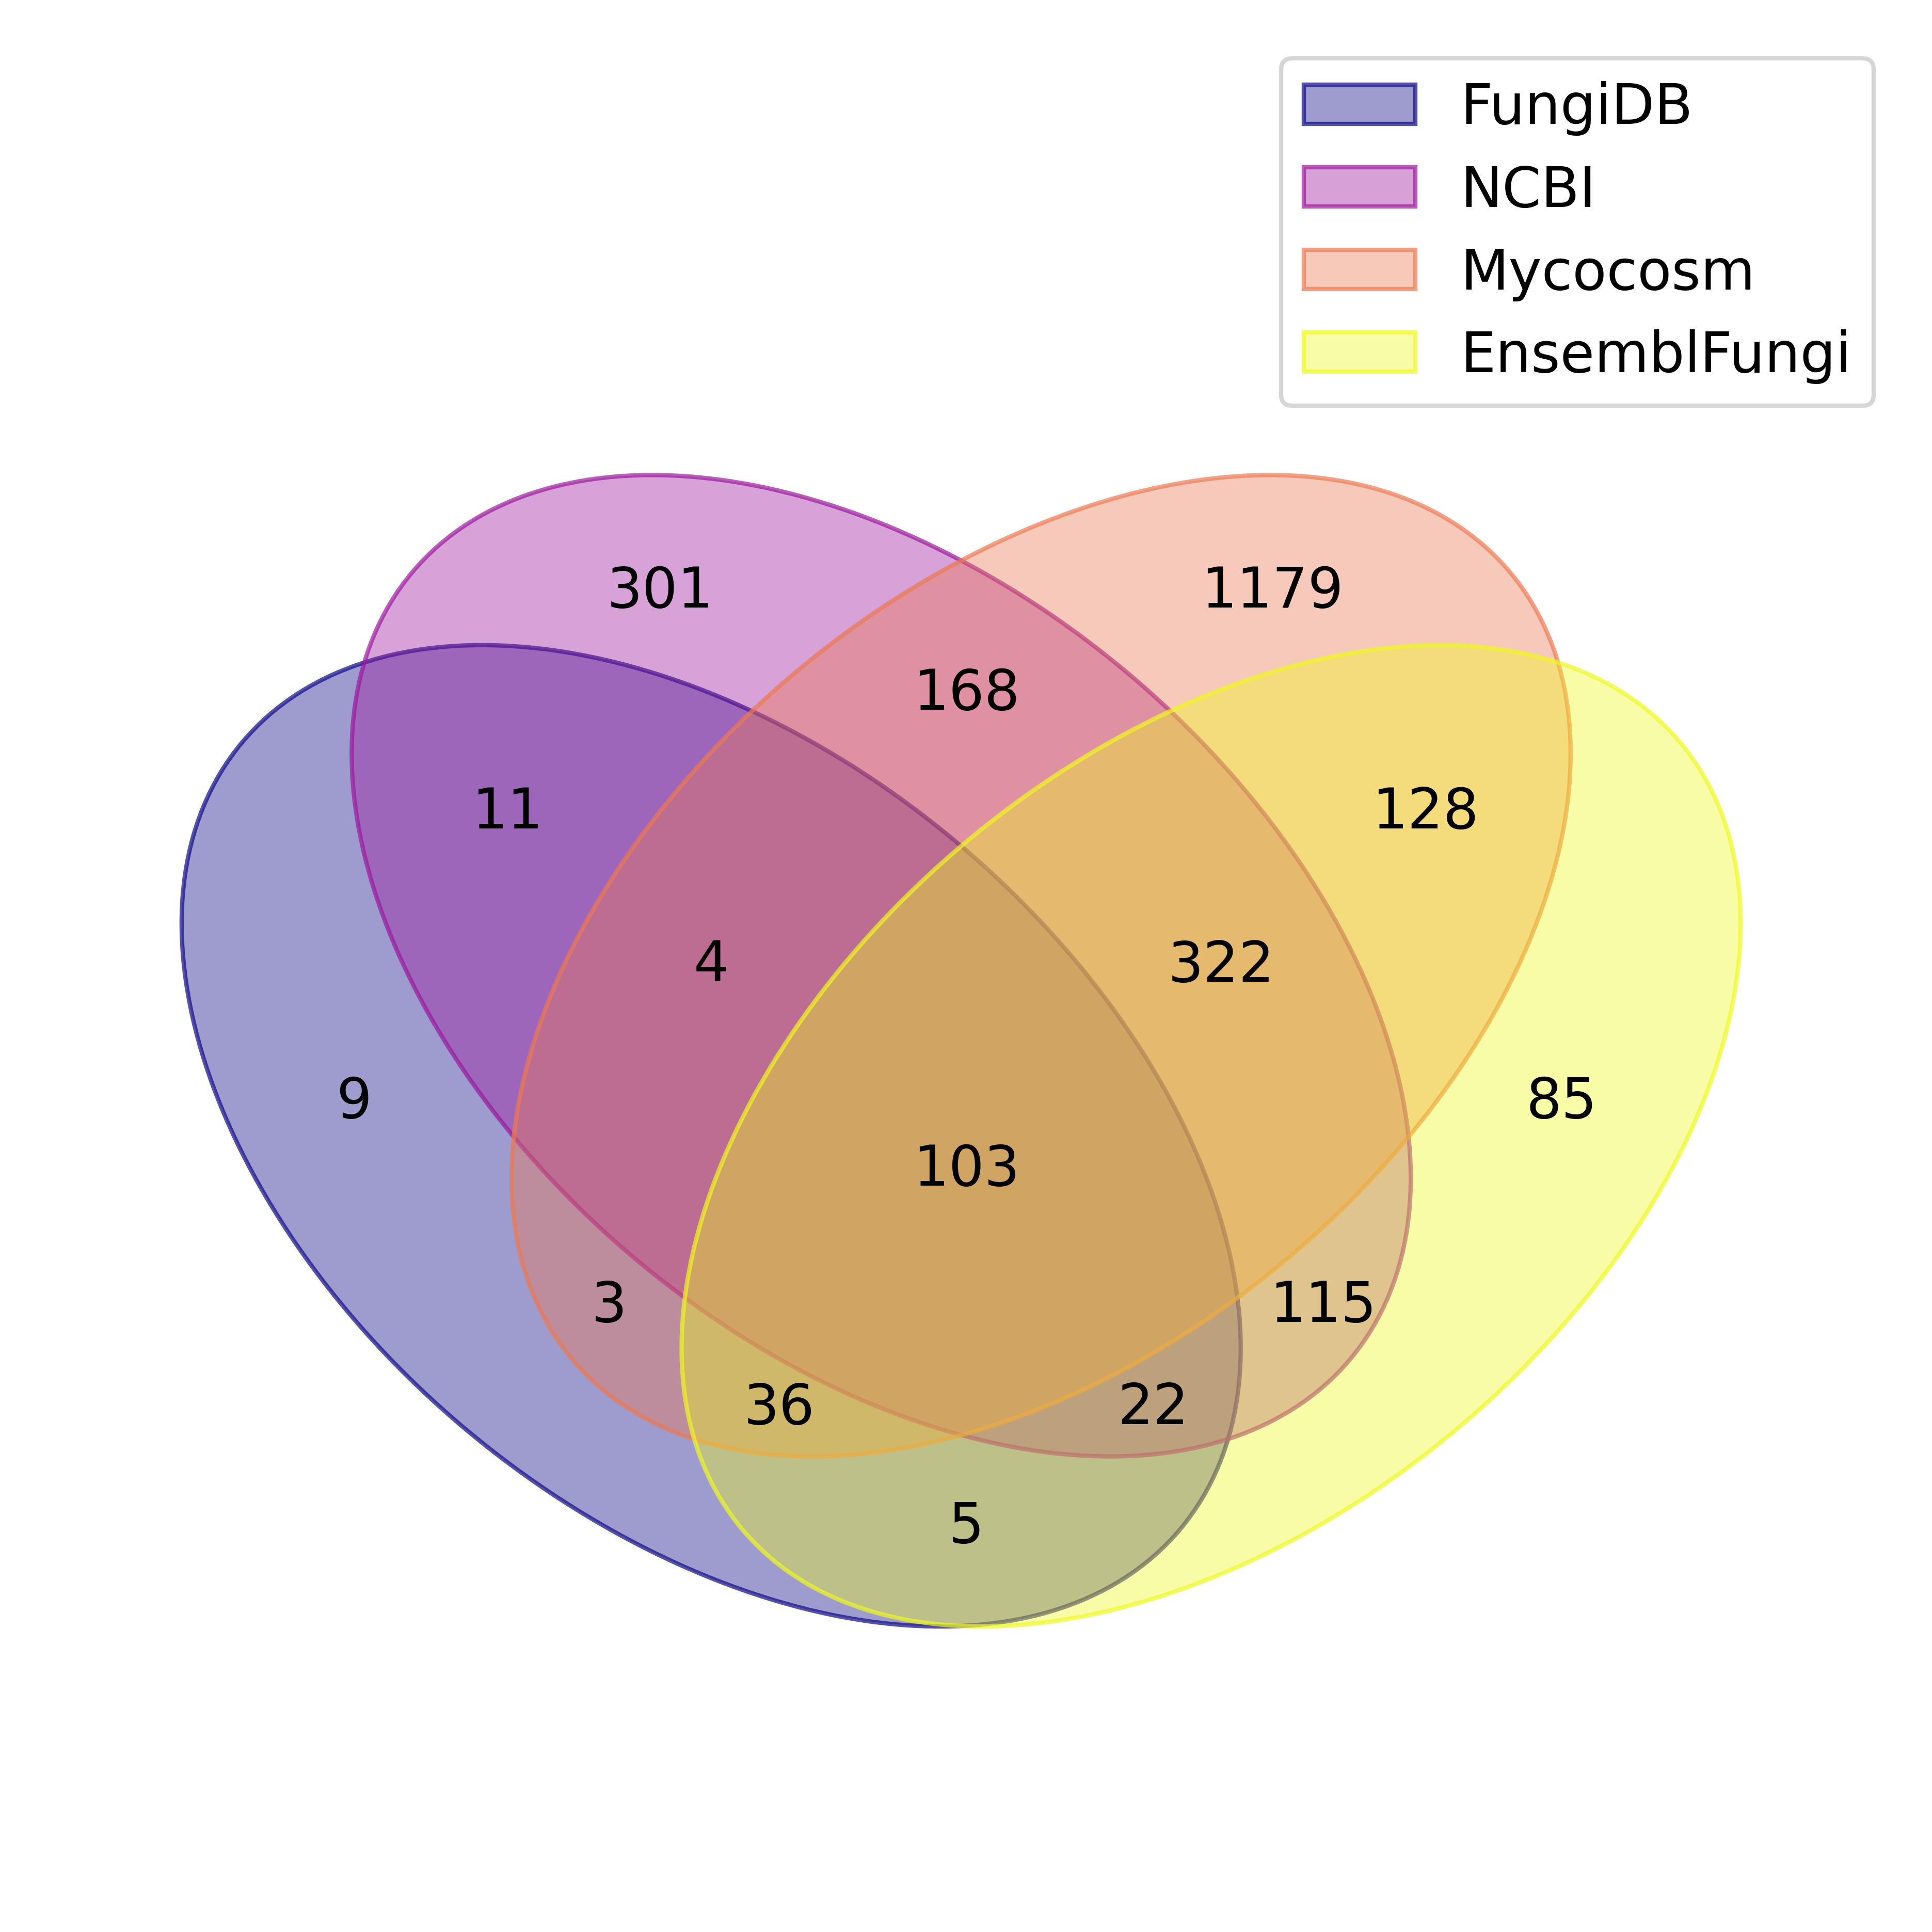

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
from venn import venn

fdb_col0 = set(fdb.iloc[:, 0])
ncbi_col0 = set(ncbi.iloc[:, 0])
mycocosm_col0 = set(mycocosm.iloc[:, 0])
ensembl_col0 = set(ensembl.iloc[:, 0])

all_four = {
    'FungiDB': fdb_col0,
    'NCBI': ncbi_col0,
    'Mycocosm': mycocosm_col0,
    'EnsemblFungi': ensembl_col0
}


venn(all_four, cmap='plasma')

In [9]:
concat = pd.concat([ncbi, fdb, ensembl, mycocosm], ignore_index=True)
all_dupes = concat[concat.duplicated(subset=['species_name'])]

concat = concat[~concat.duplicated(subset=['species_name'])].reset_index(drop=True)

concat

,species_name,genome_file_name,cds_file_name,original_name,source
0,saccharomyces_cerevisiae,saccharomyces_cerevisiae_genomic.fna,saccharomyces_cerevisiae_cds.fna,saccharomyces_cerevisiae,ncbi
1,fusarium_oxysporum,fusarium_oxysporum_genomic.fna,fusarium_oxysporum_cds.fna,fusarium_oxysporum,ncbi
2,candida_albicans,candida_albicans_genomic.fna,candida_albicans_cds.fna,candida_albicans,ncbi
3,cryptococcus_neoformans,cryptococcus_neoformans_genomic.fna,cryptococcus_neoformans_cds.fna,cryptococcus_neoformans,ncbi
4,saccharomyces_kudriavzevii,saccharomyces_kudriavzevii_genomic.fna,saccharomyces_kudriavzevii_cds.fna,saccharomyces_kudriavzevii,ncbi
...,...,...,...,...,...
2486,achaetomium_macrosporum,achaetomium_macrosporum_cbs_532.94_v1.0_genomi...,achaetomium_macrosporum_cbs_532.94_v1.0_cds.fna,achaetomium_macrosporum_cbs_532.94_v1.0,mycocosm
2487,acarospora_strigata,acarospora_strigata_cbs_132363_genomic.fna,acarospora_strigata_cbs_132363_cds.fna,acarospora_strigata_cbs_132363,mycocosm
2488,absidia_padenii,absidia_padenii_nrrl_2977_v1.0_genomic.fna,absidia_padenii_nrrl_2977_v1.0_cds.fna,absidia_padenii_nrrl_2977_v1.0,mycocosm
2489,absidia_caerulea,absidia_caerulea_nrrl1315_v1.0_genomic.fna,absidia_caerulea_nrrl1315_v1.0_cds.fna,absidia_caerulea_nrrl1315_v1.0,mycocosm


In [11]:
concat['source'].value_counts()

mycocosm    1179
ncbi        1046
ensembl      213
fdb           53
Name: source, dtype: int64